
<div style="text-align: center;">
    <img src="http://citelms.net/classes/DataAnalytics/images/covid.jpg" width=800px />
</div>

# CIT 3100
# COVID‐19 Python Data Analysis Lab

Click on the [ ] to run the Python cells below.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px

%matplotlib inline

## Step 1: Reading Data

We will load live COVID-19 data from the [GitHub data repository](https://github.com/CSSEGISandData/COVID-19) for the 2019 Novel Coronavirus Visual Dashboard by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). As the data changes, just load the data again to keep it current. The data is in 3 files for: confirmed cases, deaths, and recovered statistics. Note that the data structure of these files was changed on 3/25/20.

In [ ]:
COVID_CONFIRMED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

covid_confirmed = pd.read_csv(COVID_CONFIRMED_URL)

covid_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [ ]:
COVID_DEATHS_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
covid_deaths = pd.read_csv(COVID_DEATHS_URL)

covid_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [ ]:
COVID_RECOVERED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

covid_recovered = pd.read_csv(COVID_RECOVERED_URL)

covid_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<font color=red> From the column names above, which day was the last day that JHU collected COVID-19 data? Define this date (with the same formatting as above) as a variable called `last_day`. On a separate line, define the date of New Years Day of 2022 as `NY22`.

In [ ]:
last_day = '3/9/23'
NY22 ='1/1/22'


## Step 2: Cleaning the Data

The following code replaces the column name Country/Region with just Country and Province/State with State to make it easier to pull out columns using the . operator.  Then, in the data, we replace `Mainland china` with just `China`.
Notice that the Province/State column had a bunch of NaN's in it which is how Python marks missing data. We can replace those with blanks.

In [ ]:
covid_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
covid_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)
covid_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)

covid_confirmed.rename(columns={'Province/State':'State'}, inplace=True)
covid_deaths.rename(columns={'Province/State':'State'}, inplace=True)
covid_recovered.rename(columns={'Province/State':'State'}, inplace=True)

covid_confirmed['Country'].replace('Mainland China', 'China', inplace=True)
covid_deaths['Country'].replace('Mainland China', 'China', inplace=True)
covid_recovered['Country'].replace('Mainland China', 'China', inplace=True)

covid_confirmed.head()


,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [ ]:
covid_confirmed[['State']] = covid_confirmed[['State']].fillna('')
covid_confirmed.fillna(0, inplace=True)

covid_deaths[['State']] = covid_deaths[['State']].fillna('')
covid_deaths.fillna(0, inplace=True)

covid_recovered[['State']] = covid_recovered[['State']].fillna('')
covid_recovered.fillna(0, inplace=True)

covid_deaths.head()

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


## 3. Data Access and group by country

Remember that you can pull out a certain column with .columname (if it's one word) or ['column name']. And you can pull out a certain row using ==. For example, here we've pulled out the row where the country equals China.

In [ ]:
covid_confirmed.Country

0               Afghanistan
1                   Albania
2                   Algeria
3                   Andorra
4                    Angola
               ...         
284      West Bank and Gaza
285    Winter Olympics 2022
286                   Yemen
287                  Zambia
288                Zimbabwe
Name: Country, Length: 289, dtype: object

In [ ]:
covid_confirmed[covid_confirmed.Country == 'China']

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
59,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275
60,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,40774,40774,40774,40774,40774,40774,40774,40774,40774,40774
61,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,14715,14715,14715,14715,14715,14715,14715,14715,14715,14715
62,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,17122,17122,17122,17122,17122,17122,17122,17122,17122,17122
63,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,...,1742,1742,1742,1742,1742,1742,1742,1742,1742,1742
64,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,103248,103248,103248,103248,103248,103248,103248,103248,103248,103248
65,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,...,13371,13371,13371,13371,13371,13371,13371,13371,13371,13371
66,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,...,2534,2534,2534,2534,2534,2534,2534,2534,2534,2534
67,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,...,10483,10483,10483,10483,10483,10483,10483,10483,10483,10483
68,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,...,3292,3292,3292,3292,3292,3292,3292,3292,3292,3292


<font color=red>Pull out the data for the US.</red>

In [ ]:
covid_confirmed[covid_confirmed.Country == 'US']

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
260,,US,40.0,-100.0,1,1,2,2,5,5,...,103443455,103533872,103589757,103648690,103650837,103646975,103655539,103690910,103755771,103802702


Let's add up the total cases in Chinese states using the sum() function.

In [ ]:
covid_confirmed[covid_confirmed.Country == 'China'].sum()

State      AnhuiBeijingChongqingFujianGansuGuangdongGuang...
Country    ChinaChinaChinaChinaChinaChinaChinaChinaChinaC...
Lat                                                1085.2923
Long                                               3688.9377
1/22/20                                                  548
                                 ...                        
3/5/23                                               4903524
3/6/23                                               4903524
3/7/23                                               4903524
3/8/23                                               4903524
3/9/23                                               4903524
Length: 1147, dtype: object

We can calculate all the sums and group them by country with the following code which also shows the results for 1 date. <br>
<font color=red>Change `'2/1/21'` to `NY22`, which you defined above.</font>

In [ ]:
confirmed_by_country = covid_confirmed.groupby('Country').sum()
confirmed_NY22_by_country = confirmed_by_country[NY22]
confirmed_NY22_by_country

<ipython-input-104-1f789430b507>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Country
Afghanistan             158107
Albania                 210224
Algeria                 218818
Andorra                  23740
Angola                   82398
                         ...  
West Bank and Gaza      469748
Winter Olympics 2022         0
Yemen                    10127
Zambia                  257948
Zimbabwe                214214
Name: 1/1/22, Length: 201, dtype: int64

<font color=red>Do the same (compute the sums using groupby) for the covid_deaths data and save it in the variable `deaths_NY22_by_country`.</font>

In [ ]:
covid_deaths_by_country = covid_deaths.groupby('Country').sum()
deaths_NY22_by_country = covid_deaths_by_country[NY22]
deaths_NY22_by_country

<ipython-input-105-e8e319874550>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Country
Afghanistan             7356
Albania                 3217
Algeria                 6284
Andorra                  140
Angola                  1772
                        ... 
West Bank and Gaza      4919
Winter Olympics 2022       0
Yemen                   1984
Zambia                  3740
Zimbabwe                5017
Name: 1/1/22, Length: 201, dtype: int64

Here are the top 5 countries with the most cases.
<font color=red>Change it to NY22's date and to show the top 10.</font>

In [ ]:
confirmed_NY22_by_country = confirmed_by_country[NY22]
confirmed_NY22_by_country.sort_values().tail(10)

Country
Italy              6266939
Spain              6294745
Germany            7109182
Turkey             9519281
France            10296909
Russia            10340011
United Kingdom    13174530
Brazil            22295621
India             34889132
US                55099948
Name: 1/1/22, dtype: int64

We can make a bar plot by country. <font color=red>Change the bar plot to show 10 countries with the most cases</font>.

<Axes: title={'center': 'Top Countries with Confirmed Cases on 1/1/22'}, xlabel='Country'>

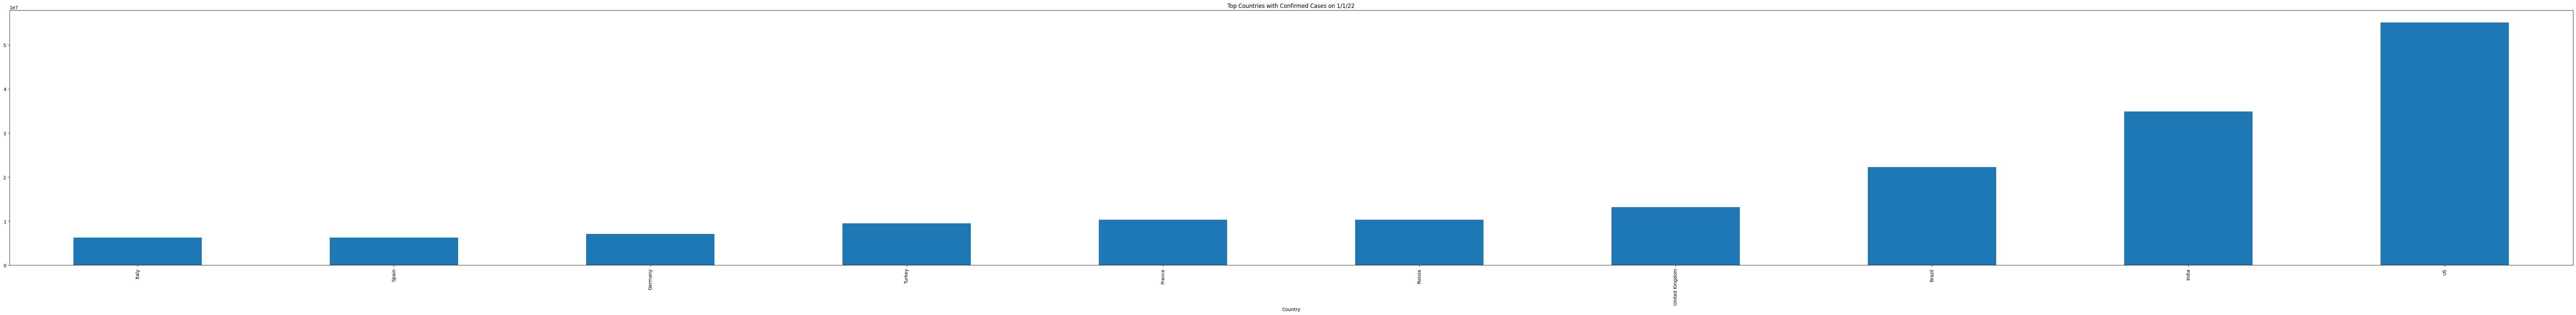

In [ ]:
top_countries = confirmed_NY22_by_country.sort_values().tail(10)
top_countries.plot.bar(title="Top Countries with Confirmed Cases on " + NY22)

<font color=red>Compute the death rate by dividing `deaths_NY22_by_country` by `confirmed_NY22_by_country` and multiplying by 100. Save it in a variable. Then sort and use tail like above and create a bar plot comparing the death rates in the top 10 countries. Note that the death rate is only for people that get the virus, not for the whole population.</font>

<Axes: title={'center': 'Countries with the highesst death rates on 1/1/22'}, xlabel='Country'>

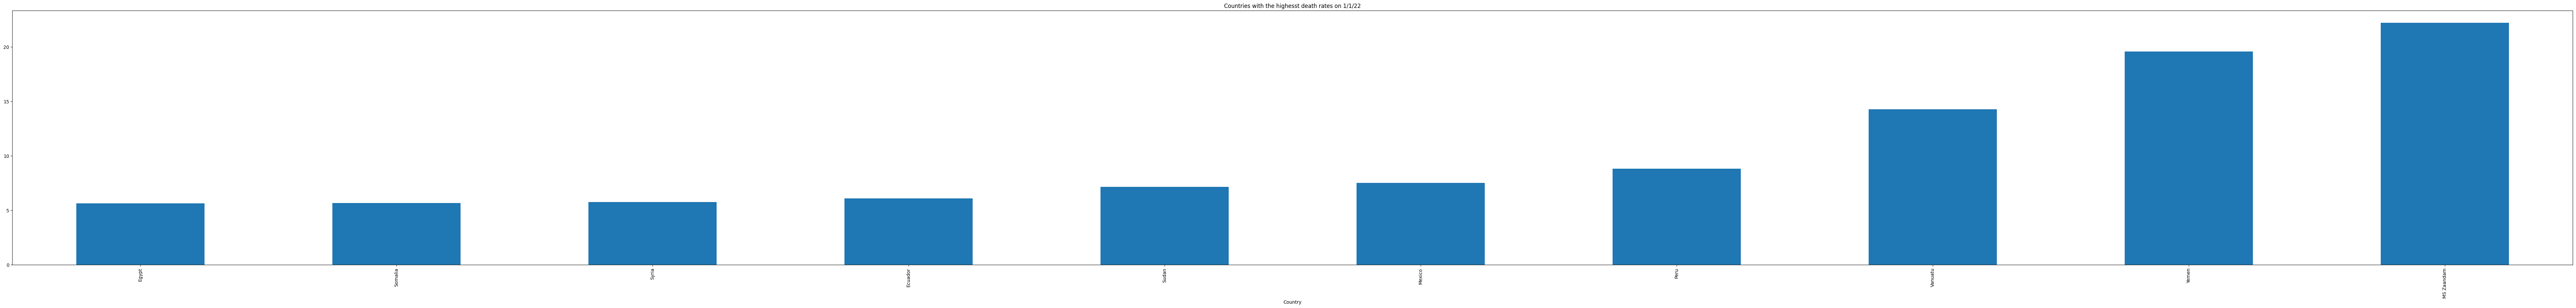

In [ ]:
death_rate = (deaths_NY22_by_country / confirmed_NY22_by_country) * 100
death_rate = death_rate.dropna()
top_countries = death_rate.sort_values().tail(10)
top_countries.plot.bar(title="Countries with the highesst death rates on " + NY22)

## 4. World Totals

Let's add up all the rows of countries for each date to find the world totals. The sum function can add up all the data for a date (column) for all the countries (rows).



In [ ]:
total_confirmed = covid_confirmed.sum()
total_confirmed

State      Australian Capital TerritoryNew South WalesNor...
Country    AfghanistanAlbaniaAlgeriaAndorraAngolaAntarcti...
Lat                                              5659.272246
Long                                             6366.258024
1/22/20                                                  557
                                 ...                        
3/5/23                                             676024901
3/6/23                                             676082941
3/7/23                                             676213378
3/8/23                                             676392824
3/9/23                                             676570149
Length: 1147, dtype: object

Let's only keep the rows after row 4 since it doesn't make sense to sum the province, country, lat, and long. (Remember rows start numbering at 0).

In [ ]:
total_confirmed = total_confirmed[4:]
total_confirmed

1/22/20          557
1/23/20          657
1/24/20          944
1/25/20         1437
1/26/20         2120
             ...    
3/5/23     676024901
3/6/23     676082941
3/7/23     676213378
3/8/23     676392824
3/9/23     676570149
Length: 1143, dtype: object

We can pull out a particular column (date) with the array notation [] (or a . if the column name is just a single word). <font color=red>Change the date below to NY22's date.</font>

In [ ]:
total_confirmed[NY22]

289931428

<font color=red>Complete the code below to calculate the sum of the worldwide deaths and print it out for the `last_day`'s date using the dataframe covid_deaths. Hint: this is the same code you did above for covid_confirmed, but now for covid_deaths.</font>



In [ ]:
total_deaths = covid_deaths.sum()
total_deaths = total_deaths[4:]
total_deaths[last_day]

6881802

Let's calculate the death rate.

In [ ]:
total_deaths/total_confirmed * 100

1/1/21     2.266262
1/1/22     1.887785
1/1/23     1.013112
1/10/21     2.23157
1/10/22    1.775835
             ...   
9/9/22     1.070965
Country         NaN
Lat             NaN
Long            NaN
State           NaN
Length: 1147, dtype: object

<font color=red>Extra-credit Challenge:</font> Can you figure out the death rate in the US?</font>

In [ ]:
us_deaths = covid_deaths[covid_deaths.Country == 'US']
total_us_deaths = us_deaths.sum()
total_us_deaths

State             
Country         US
Lat           40.0
Long        -100.0
1/22/20          0
            ...   
3/5/23     1122134
3/6/23     1122181
3/7/23     1122516
3/8/23     1123246
3/9/23     1123836
Length: 1147, dtype: object

## 5. Line plots over dates

Let's make a line plot showing the growth of cases from day to day using the matplotlib (plt) library. <br>
<font color=red>Add another plt.plot for the total_deaths. Add 'Deaths' to the legend array too.</font> See https://www.geeksforgeeks.org/plot-multiple-lines-in-matplotlib/ for help.




<ipython-input-119-3670aa309977>:3: UserWarning:

Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries



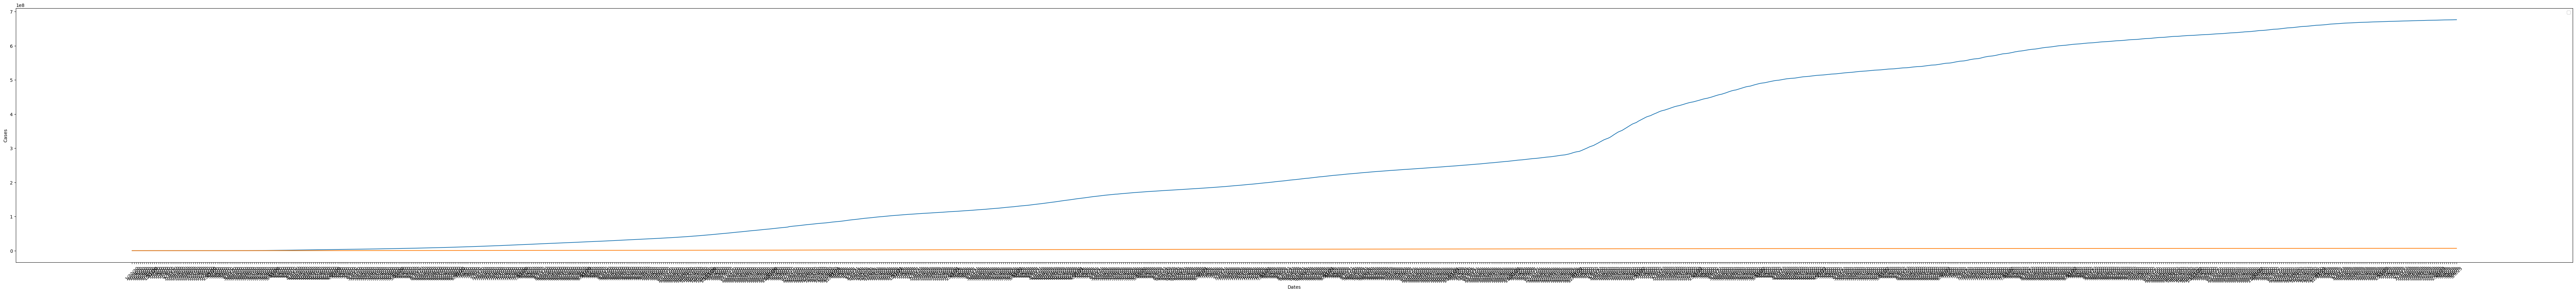

In [ ]:
plt.plot(total_confirmed)
plt.plot(total_deaths)
plt.legend(['Confirmed Cases'], ['Deaths'])
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.rcParams["figure.figsize"] = [100,10]
plt.xticks(rotation=45)
plt.show()



## 6. Geo-visualizations with Plotly Express


The library plotly express (px) has maps like scatter_geo. Let's make a plot for NY22.

In [ ]:
fig = px.scatter_geo(covid_confirmed,
                     lat="Lat", lon="Long", color=NY22,
                     hover_name="Country", size=NY22,
                     size_max=40,
                     template='plotly', projection="natural earth",
                     title="COVID-19 worldwide confirmed cases")

fig.show()

<font color=red>See if you can generate a similar map for covid_deaths.</font>

In [ ]:
fig = px.scatter_geo(covid_deaths,
                     lat="Lat", lon="Long", color=NY22,
                     hover_name="Country", size=NY22,
                     size_max=40,
                     template='plotly', projection="natural earth",
                     title="COVID-19 worldwide deaths")

fig.show()

Click on Share at the top right. Grab the link and post it on Moodle.